## Polynomial Regression
### Advantages: Works on any size dataset, works very well on non-linear problems
### Disadvantages: Need to choose the right polynomial degree for a good bias/variance tradeoff - prone to overfitting

In [5]:
# Preprocess the data
import os
import pandas as pd

DATASET_PATH = "datasets/pos_salaries"
DATASET_URL = DATASET_PATH + "/Position_Salaries.csv"

def fetch_pos_salary_data(dataset_url=DATASET_URL, dataset_path=DATASET_PATH):
    if not os.path.isdir(dataset_path):
        os.makedirs(dataset_path)

dataset = fetch_startup_data()

In [6]:
# Define X and y arrays, dataset too small for a test/train set
def load_pos_salary_data(dataset_path=DATASET_PATH):
    csv_path = os.path.join(dataset_path, "Position_Salaries.csv")
    return pd.read_csv(csv_path)

dataset = load_startup_data()
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [7]:
# Define linear regressor to show how performance varies
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
# Define 2nd degree polynomial regressor
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)

In [10]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

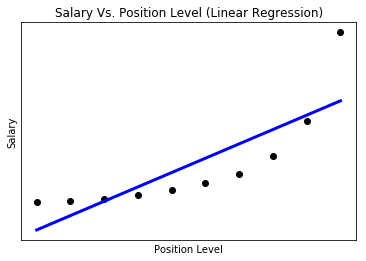

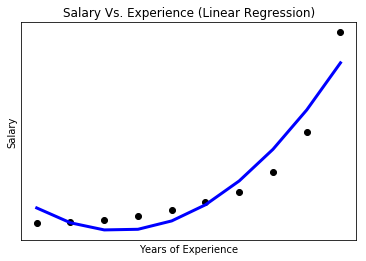

In [20]:
# Visualize the results for 2nd degree polynomial vs linear
import matplotlib.pyplot as plt

# Plot outputs
plt.scatter(X, y,  color='black')
plt.plot(X, lin_reg.predict(X), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.title('Salary Vs. Position Level (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')

plt.show()

plt.scatter(X, y,  color='black')
plt.plot(X, lin_reg2.predict(poly_reg.fit_transform(X)), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.title('Salary Vs. Experience (Linear Regression)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

plt.show()

In [33]:
# What are the performance metrics?
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lin_reg2.predict(poly_reg.fit_transform(X))
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y, y_pred))


Mean squared error: 6758833333.33
Variance score: 0.92


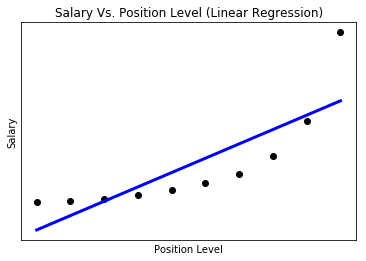

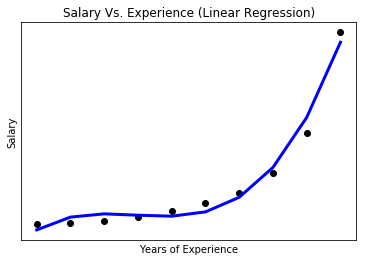

Mean squared error: 1515662004.66
Variance score: 0.98


In [34]:
# Visualize the results for 3rd degree polynomial
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)
lin_reg2.fit(X_poly, y)

# Plot outputs
plt.scatter(X, y,  color='black')
plt.plot(X, lin_reg.predict(X), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.title('Salary Vs. Position Level (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')

plt.show()

plt.scatter(X, y,  color='black')
plt.plot(X, lin_reg2.predict(poly_reg.fit_transform(X)), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.title('Salary Vs. Experience (Linear Regression)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

plt.show()

y_pred = lin_reg2.predict(poly_reg.fit_transform(X))
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y, y_pred))

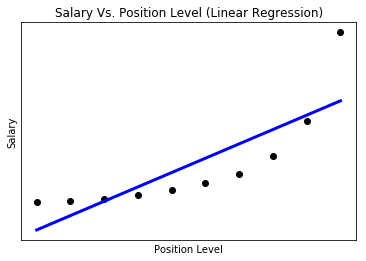

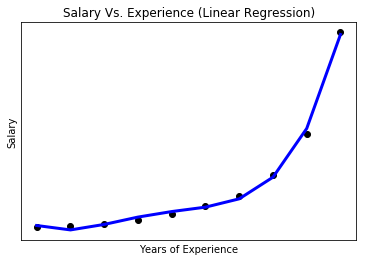

Mean squared error: 210343822.84
Variance score: 1.00


In [35]:
# Visualize the results for 4th degree polyomial
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg2.fit(X_poly, y)

# Plot outputs
plt.scatter(X, y,  color='black')
plt.plot(X, lin_reg.predict(X), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.title('Salary Vs. Position Level (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')

plt.show()

plt.scatter(X, y,  color='black')
plt.plot(X, lin_reg2.predict(poly_reg.fit_transform(X)), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.title('Salary Vs. Experience (Linear Regression)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

plt.show()

y_pred = lin_reg2.predict(poly_reg.fit_transform(X))
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y, y_pred))

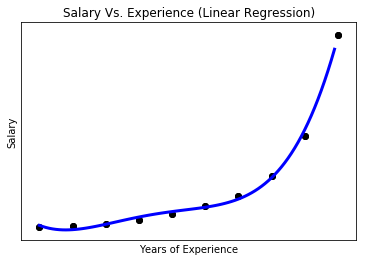

In [39]:
# Visualize again with some smoothing
import numpy as np

X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X, y,  color='black')
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.title('Salary Vs. Experience (Linear Regression)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

plt.show()

In [40]:
#Predict a new result w. Linear Reg
lin_reg.predict(6.5)

array([ 330378.78787879])

In [42]:
#Predict a new result w. Polynomial Reg
lin_reg2.predict(poly_reg.fit_transform(6.5))

array([ 158862.45265153])